# Assignment 7: Exploring 3D Sinusoidal Data using Artificial Neural Networks
## DTSC 680: Applied Machine Learning

## Name: 

## Directions and Overview

The main purpose of this assignment is for you to gain experience using artificial neural networks to solve simple regression problems.  In this assignment, you will fit a neural network to a noisy 3D sinusoidal data set.  You will use a `Sequential` model that can be trained very quickly on the supplied data, so I want you to manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the reasonable hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

So, play around and build some models.  When you are done playing with hyperparameter values, you should finish by building an ANN that models the data reasonably well! You should be able to train a model and use it to predict a curve at least as good as mine, but your goal should be to obtain a smoother and less erratic curve.

(Side Note: Achieving a less erratic prediction curve could be done either by building a better model, ___OR___ by sorting the data more intelligently thereby plotting a prediction curve that looks better.  I propose the ideal line is created by sorting the data in such a way that the resulting line minimizes the arc length of the curve. You don't need to worry about any of this, however you do need to generate a figure with a descent-looking prediction curve superimposed on the data.)

Here just just a few of the hyperparameters you can play around with:

- number of nodes per layer
- number of layers
- activation functions
- normalization method (should be negligible)
- number of epochs
- learning rate
- loss function

You will know that you have obtained a reasonable model when the model's prediction curve looks reasonable.  ___Below you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline looks totally crazy and out-of-this-world when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with plotting the trendline from examining this new scatter plot of the model's predictions.  Your final submission, however, should contain a connected line plot.___  

Lastly in this assignment, you will compute the generalization error on the test set.

## Preliminaries

Let's import some common packages:

In [994]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(df:pd.DataFrame):
    scat_x = train_df['x']
    scat_y = train_df['y']
    scat_z = train_df['z']
    
    fig = plt.figure(figsize=[15, 15]) #creating figure and setting size

    #creating all four subplots via the add_subplot function
    ax = fig.add_subplot(2, 2, 1, projection='3d') #projection 3d makes the figure 3 dimensional. I also specify how many subplots and which one each subplot is here.
    xLabel = ax.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax.set_zlabel('z', fontsize=15, color="darkred")
    ax.set_xlim3d(-1.75, 1.75)
    ax.set_ylim3d(-1.75, 1.75)
    ax.set_zlim3d(-1.75, 1.75)
    ax.view_init(0, 90) #I played around with this until I got the desired angle
    ax.scatter3D(scat_x, scat_y, scat_z, cmap = 'Blues')

    #repeat three more times.
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    xLabel = ax2.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax2.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax2.set_zlabel('z', fontsize=15, color="darkred")
    ax2.set_xlim3d(-1.75, 1.75)
    ax2.set_ylim3d(-1.75, 1.75)
    ax2.set_zlim3d(-1.75, 1.75)
    ax2.view_init(45, 0) #I played around with this until I got the desired angle
    ax2.scatter3D(scat_x, scat_y, scat_z, cmap = 'Blues')

    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    xLabel = ax3.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax3.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax3.set_zlabel('z', fontsize=15, color="darkred")
    ax3.set_xlim3d(-1.75, 1.75)
    ax3.set_ylim3d(-1.75, 1.75)
    ax3.set_zlim3d(-1.75, 1.75)
    ax3.view_init(30, 90)
    ax3.scatter3D(scat_x, scat_y, scat_z, cmap = 'Blues')

    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    xLabel = ax4.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax4.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax4.set_zlabel('z', fontsize=15, color="darkred")
    ax4.set_xlim3d(-1.75, 1.75)
    ax4.set_ylim3d(-1.75, 1.75)
    ax4.set_zlim3d(-1.75, 1.75)
    ax4.view_init(-90, -90)
    ax4.scatter3D(scat_x, scat_y, scat_z, cmap = 'Blues')
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
   
    fig = plt.figure(figsize=[15, 15]) #creating figure and setting size

    #creating all four subplots via the add_subplot function
    ax = fig.add_subplot(2, 2, 1, projection='3d') #projection 3d makes the figure 3 dimensional. I also specify how many subplots and which one each subplot is here.
    xLabel = ax.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax.set_zlabel('z', fontsize=15, color="darkred")
    ax.set_xlim3d(-1.75, 1.75)
    ax.set_ylim3d(-1.75, 1.75)
    ax.set_zlim3d(-1.75, 1.75)
    ax.view_init(0, 90) #I played around with this until I got the desired angle
    ax.scatter3D(scat_x, scat_y, scat_z, cmap ='Blues')
    ax.plot3D(fit_x, fit_y, fit_z, c = "black")
    

    #repeat three more times.
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    xLabel = ax2.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax2.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax2.set_zlabel('z', fontsize=15, color="darkred")
    ax2.set_xlim3d(-1.75, 1.75)
    ax2.set_ylim3d(-1.75, 1.75)
    ax2.set_zlim3d(-1.75, 1.75)
    ax2.view_init(45, 0)
    ax2.scatter3D(scat_x, scat_y, scat_z, cmap ='Blues')
    ax2.plot3D(fit_x, fit_y, fit_z, c = "black")

    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    xLabel = ax3.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax3.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax3.set_zlabel('z', fontsize=15, color="darkred")
    ax3.set_xlim3d(-1.75, 1.75)
    ax3.set_ylim3d(-1.75, 1.75)
    ax3.set_zlim3d(-1.75, 1.75)
    ax3.view_init(30, 90)
    ax3.scatter3D(scat_x, scat_y, scat_z, cmap = 'Blues')
    ax3.plot3D(fit_x, fit_y, fit_z, c = "black")

    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    xLabel = ax4.set_xlabel('x', fontsize=15, color="darkred")
    yLabel = ax4.set_ylabel('y', fontsize=15, color="darkred")
    zLabel = ax4.set_zlabel('z', fontsize=15, color="darkred")
    ax4.set_xlim3d(-1.75, 1.75)
    ax4.set_ylim3d(-1.75, 1.75)
    ax4.set_zlim3d(-1.75, 1.75)
    ax4.view_init(-90, -90)
    ax4.scatter3D(scat_x, scat_y, scat_z, cmap = 'Blues')
    ax4.plot3D(fit_x, fit_y, fit_z, c = "black")


# Import, Split and Standardize Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidalANN.csv`.  Name the returned DataFrame `data`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. Looking at the below graph, it makes sense for `x` and `z` to be your training data and `y` to be your response data.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

3. Next, use the `StandardScaler()` to scale your data.

In [995]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('3DSinusoidalANN.csv')

data

,x,y,z
0,5.003425,-0.097041,0.136004
1,4.914072,-0.049873,-1.726903
2,5.236610,0.257471,-1.838183
3,5.217523,0.212911,-0.669068
4,5.114359,0.808719,0.302012
...,...,...,...
555,-4.948576,0.612473,157.926856
556,-4.980705,0.645476,154.257156
557,-5.021362,0.272735,156.571613
558,-4.953544,0.257083,157.720199


In [996]:
X = data[['x', 'z']]
y = data[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

scaler  = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
Xtest_scale = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
y_scale = pd.DataFrame(scaler.fit_transform(y_train), columns = y_train.columns)
ytest_test = pd.DataFrame(scaler.transform(y_test), columns = y_test.columns)

train_df = pd.concat([X_scale, y_scale], axis = 1)

In [997]:
X_train

,x,z
522,-2.487701,148.773780
462,4.358237,132.628077
0,5.003425,0.136004
11,5.209853,3.080547
286,-2.464089,84.692419
...,...,...
71,-1.863929,19.043697
106,-4.712330,27.002801
270,-0.903058,82.016390
435,4.713764,127.587837


In [998]:
X_test

,x,z
453,5.046254,128.590281
341,-4.893695,95.705649
177,1.103277,52.048637
86,-2.987890,21.341995
332,-4.691670,95.233510
...,...,...
88,-3.381779,23.267994
235,4.250217,66.599601
352,-4.378204,100.094914
33,3.976370,2.140693


In [999]:
train_df

,x,z,y
0,-0.710412,1.484588,1.060069
1,1.170909,1.133518,0.597008
2,1.348213,-1.747367,-0.249185
3,1.404941,-1.683342,0.126391
4,-0.703923,0.091213,0.992957
...,...,...,...
443,-0.538994,-1.336241,1.166031
444,-1.321759,-1.163180,0.309647
445,-0.274939,0.033026,1.227174
446,1.268611,1.023924,-0.373109


# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell. 

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

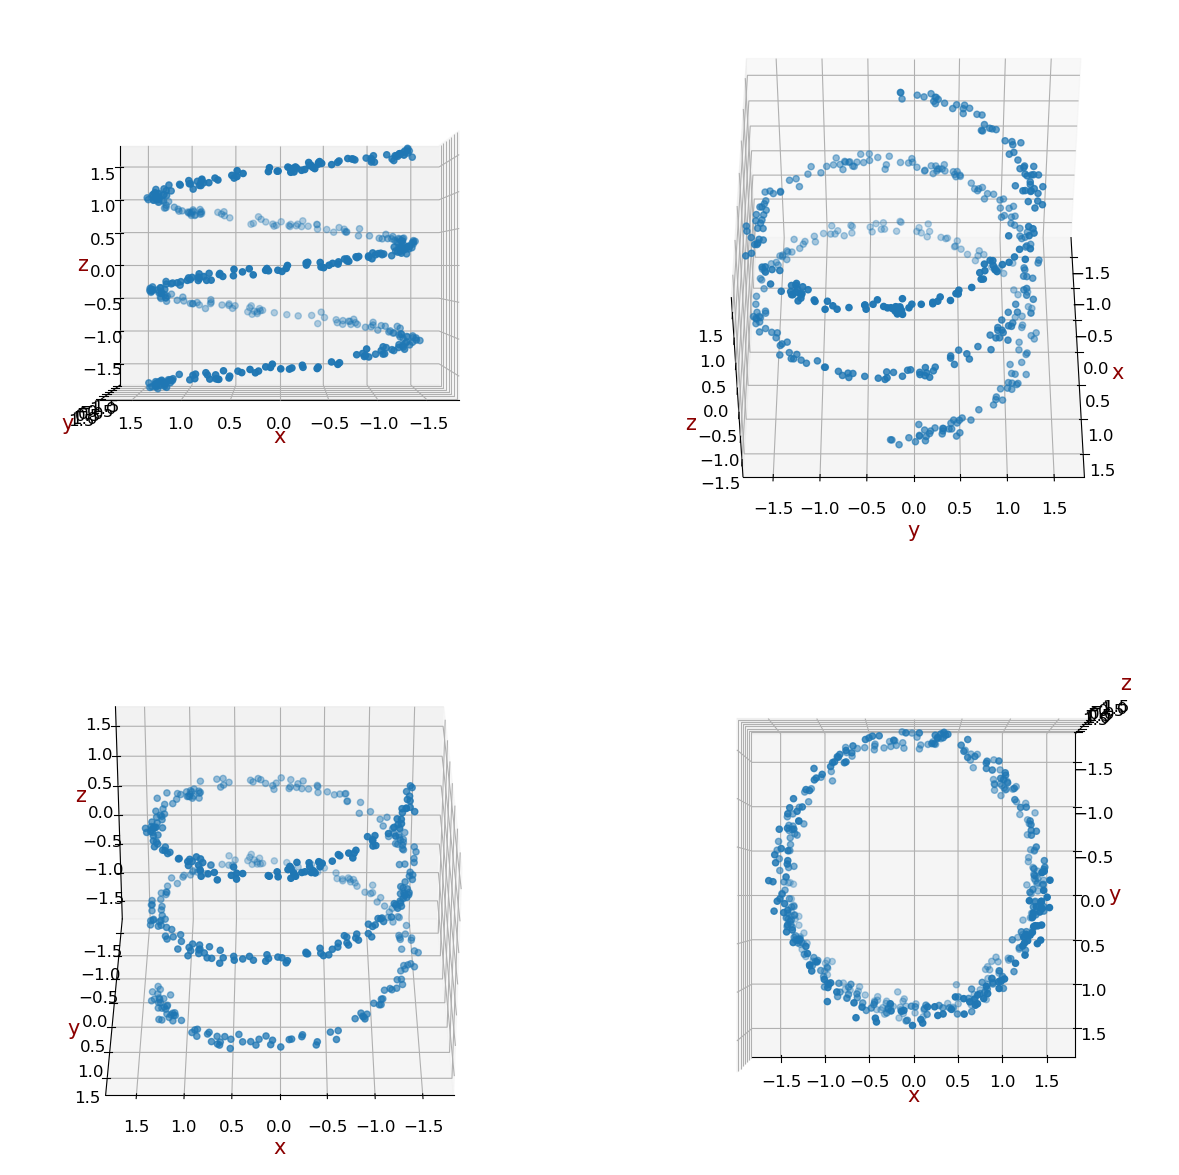

In [1000]:
plot3Ddata(train_df)

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays.  The three Numpy arrays called `fit_x, fit_y,` and  `fit_z` represent the x, y, and z coordinates of the model predictions (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)  You will use the `plotscatter3Ddata()` function in the following section.

# Explore 3D Sinusoidal Data with Artifical Neural Networks

Fit a `Sequential` model to this data.  You must manually assign values to the hyperparameters, including the number of nuerons per layer and the number of layers.  You should "play around" by using different combinations of hyperparameter values.  When you are done playing, you should build an ANN that models the data well.  Then, you will use that modelto calculate the generalization error in the subsequent section.

In [1001]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense

model = keras.models.Sequential([    
    keras.layers.Dense(260, activation= 'relu', input_dim = 2), #need to use input shape or input dim here
    keras.layers.Dense(130, activation="relu"),
    keras.layers.Dense(65, activation="relu"),
    keras.layers.Dense(1, activation="linear"), 
    ]) #use linear activation here. If I use relu or softmax, all values are 0

In [1002]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 260)               780       
                                                                 
 dense_158 (Dense)           (None, 130)               33930     
                                                                 
 dense_159 (Dense)           (None, 65)                8515      
                                                                 
 dense_160 (Dense)           (None, 1)                 66        
                                                                 
Total params: 43,291
Trainable params: 43,291
Non-trainable params: 0
_________________________________________________________________


In [1003]:
model.layers

In [1004]:
model.compile(loss= "mean_squared_error",
              optimizer= "adam",
              metrics=['accuracy'])

In [1011]:
model.fit(X_scale, y_scale, epochs=70, validation_data= (Xtest_scale, ytest_test))
#started with 30 epochs and increased from there. Seems like the more epochs, the better the fit?

Epoch 1/70
14/14 [==============================] - 0s 6ms/step - loss: 0.0417 - accuracy: 0.0000e+00 - val_loss: 0.0371 - val_accuracy: 0.0000e+00
Epoch 2/70
14/14 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.0000e+00 - val_loss: 0.0451 - val_accuracy: 0.0000e+00
Epoch 3/70
14/14 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.0000e+00 - val_loss: 0.0392 - val_accuracy: 0.0000e+00
Epoch 4/70
14/14 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.0470 - val_accuracy: 0.0000e+00
Epoch 5/70
14/14 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.0000e+00 - val_loss: 0.0375 - val_accuracy: 0.0000e+00
Epoch 6/70
14/14 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.0000e+00 - val_loss: 0.0386 - val_accuracy: 0.0000e+00
Epoch 7/70
14/14 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.0000e+00 - val_loss

14/14 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.0000e+00 - val_loss: 0.0300 - val_accuracy: 0.0000e+00
Epoch 57/70
14/14 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.0000e+00 - val_loss: 0.0410 - val_accuracy: 0.0000e+00
Epoch 58/70
14/14 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.0000e+00 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 59/70
14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.0000e+00 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 60/70
14/14 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 61/70
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.0000e+00 - val_loss: 0.0304 - val_accuracy: 0.0000e+00
Epoch 62/70
14/14 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 0.0000e+00 - val_loss: 0.0

### Plot Model Predictions for Training Set

Use the model's `predict()` method to make a prediction for `y` using the `x` and `z` training data.  Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [1012]:
y_pred = model.predict(X_scale)

y_pred

14/14 [==============================] - 0s 1ms/step


array([[ 1.0890499 ],
       [ 0.6995648 ],
       [ 0.30198145],
       [ 0.00665287],
       [ 0.9823432 ],
       [ 0.59972364],
       [-1.7415383 ],
       [-0.57345784],
       [ 0.04825192],
       [ 0.5658832 ],
       [ 0.8388949 ],
       [-1.2412965 ],
       [-1.5372179 ],
       [-1.3223469 ],
       [ 0.5149776 ],
       [ 1.1952164 ],
       [ 1.13473   ],
       [ 1.2401406 ],
       [ 0.9237106 ],
       [ 0.18094705],
       [-1.6847848 ],
       [-1.7232995 ],
       [ 1.2883078 ],
       [-0.4623634 ],
       [ 1.2103145 ],
       [ 0.5507678 ],
       [-0.49517375],
       [ 1.1891367 ],
       [ 0.01105306],
       [ 0.15320323],
       [-1.2440848 ],
       [ 0.9689959 ],
       [-1.5036631 ],
       [-1.7023754 ],
       [-1.5548958 ],
       [ 1.0295246 ],
       [-0.79911697],
       [-1.215872  ],
       [ 1.1596266 ],
       [ 0.28215522],
       [ 0.80381507],
       [ 0.5867539 ],
       [ 0.13584395],
       [-1.5095959 ],
       [-0.5777308 ],
       [-1

In [1013]:
y_preds = pd.DataFrame(y_pred)
y_preds

,0
0,1.089050
1,0.699565
2,0.301981
3,0.006653
4,0.982343
...,...
443,1.063673
444,0.225624
445,1.207448
446,-0.013479


In [1014]:
new_frame = pd.concat([train_df, y_preds], axis=1)
new_frame.rename(columns = {0:'y_preds'}, inplace = True)
new_frame = new_frame.sort_values(by=['z'], ascending = True) #sorting by z seems to get the line to fit
new_frame

,x,z,y,y_preds
388,1.323658,-1.787874,-0.235210,0.473786
121,1.407049,-1.764873,-0.157347,0.220070
2,1.348213,-1.747367,-0.249185,0.301981
308,1.378698,-1.743758,0.019190,0.224154
5,1.203130,-1.730933,0.410999,0.599724
...,...,...,...,...
195,-1.347004,1.642045,0.111776,0.289137
411,-1.373417,1.643906,0.038594,0.227544
370,-1.406683,1.654143,-0.139621,0.176180
230,-1.372173,1.674037,0.188074,0.328634


In [1015]:
scat_x = new_frame['x']
scat_y = new_frame['y']
scat_z = new_frame['z']

fit_x = new_frame['x']
fit_y = new_frame['y_preds']
fit_z = new_frame['z']

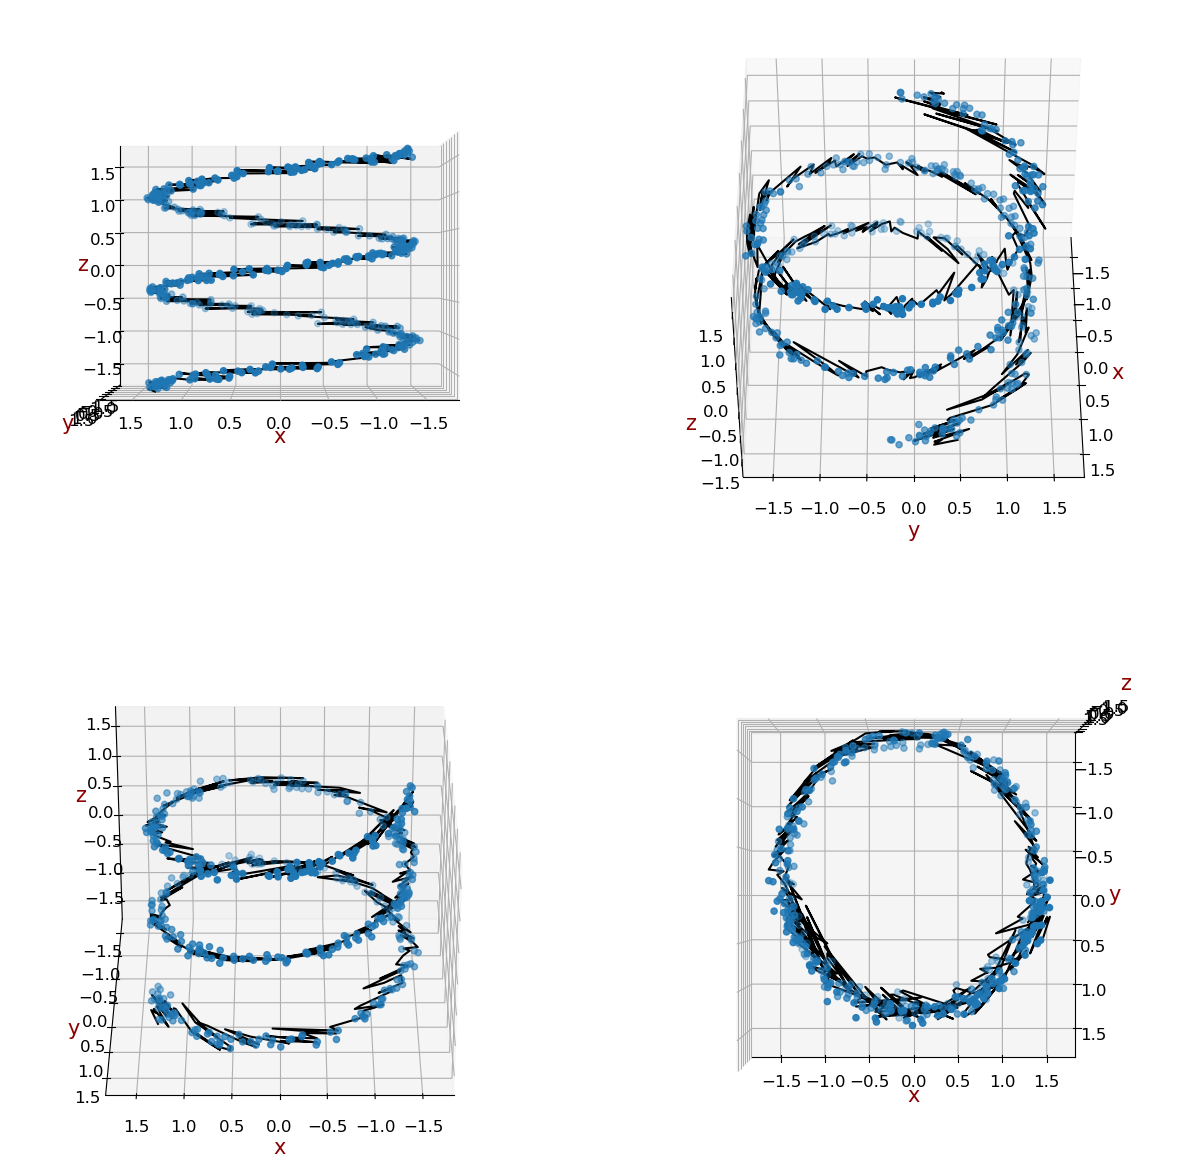

In [1016]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z) #this is best I could get it to fit
#I ran the model over 30 times, changing the parameters each time but for some reason can not get it to fit as
#perfectly as it did the first time I got it to work.

The below image shows that the plot model itself works as the scatter prediction curve works. This is about how well the plotted line fit the first time. I've played around with it for a while and now I'm convinced

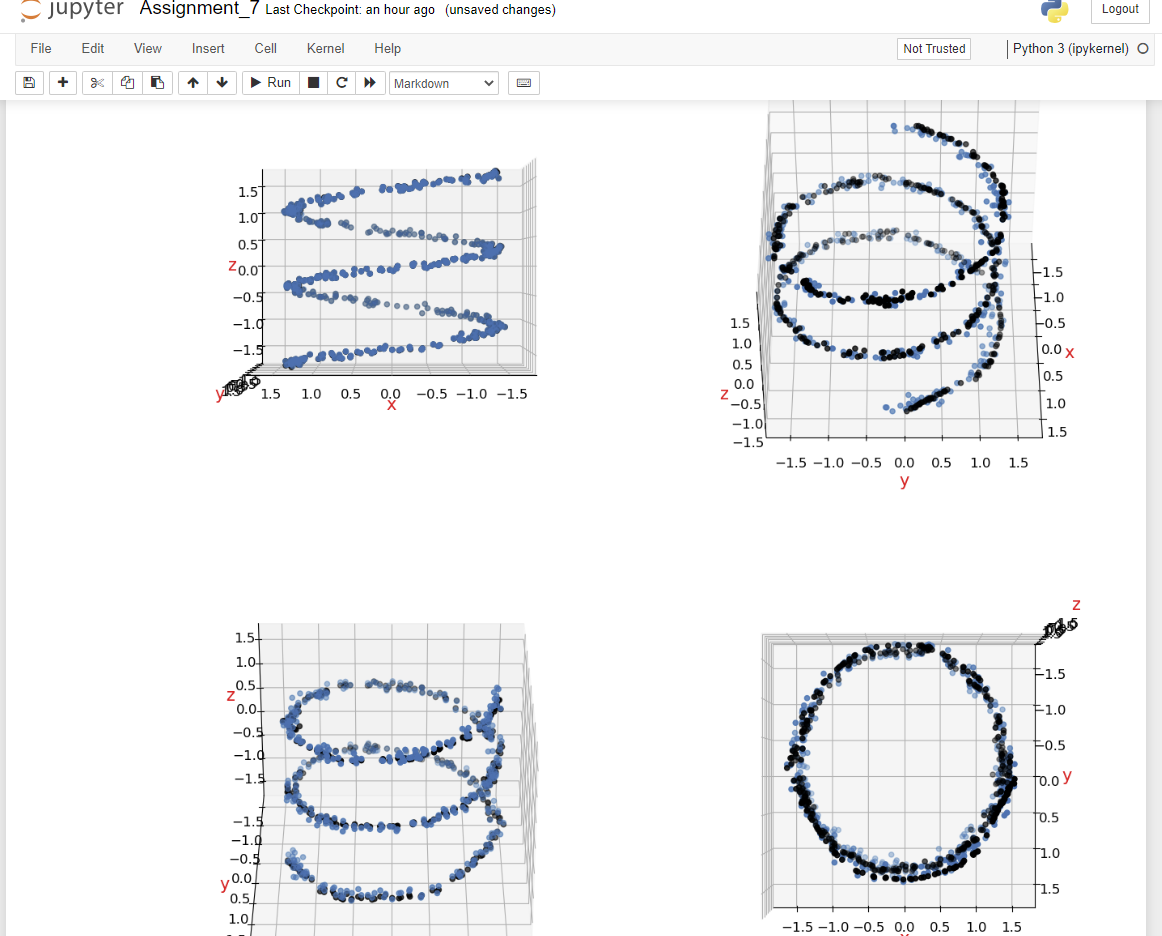

# Compute Generalization Error

Compute the generalization error and use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for the model.

In [1017]:
from sklearn.metrics import mean_squared_error

mse_ANN = mean_squared_error(y_scale, y_pred).round(4)

print(mse_ANN)
#mean squared error to close to zero so there are minimal differences between actual and predicted.
#Thought we had to use test data to run this but test data is only 112 rows vs 448. I keep getting an error

0.0285
